In [1]:
import sys
import os
from pathlib import Path
sys.path.append(str(Path.cwd().parent))

In [2]:
from hydro_stats import *

<h2>Statystyki</h2>


Number of observations: 63
WWQ: 1340.0	 SWQ: 124.86	 NWQ: 20.9
WSQ: 20.6	 SSQ: 12.80	 NSQ: 7.1
WNQ: 7.8	 SNQ: 3.95	 NNQ: 1.16

      winter_min  winter_mean  winter_max  summer_min  summer_mean  \
mean       3.946       13.818      90.181       3.946       11.807   
std        1.359        3.634      46.966       1.625        4.926   
min        1.160        6.320      28.000       1.240        4.110   
25%        3.100       11.100      56.850       2.910        7.900   
50%        3.790       13.800      80.000       4.180       10.800   
75%        4.700       16.900     103.000       4.825       15.100   
max        7.800       21.200     244.000       7.700       23.800   

      summer_max  year_mean  year_max  year_min  
mean     159.535     12.797   182.719     3.284  
std      190.508      3.273   181.216     1.275  
min       20.900      7.100    38.900     1.160  
25%       59.350     10.300    90.000     2.305  
50%      106.000     12.400   145.000     3.200  
75%      18

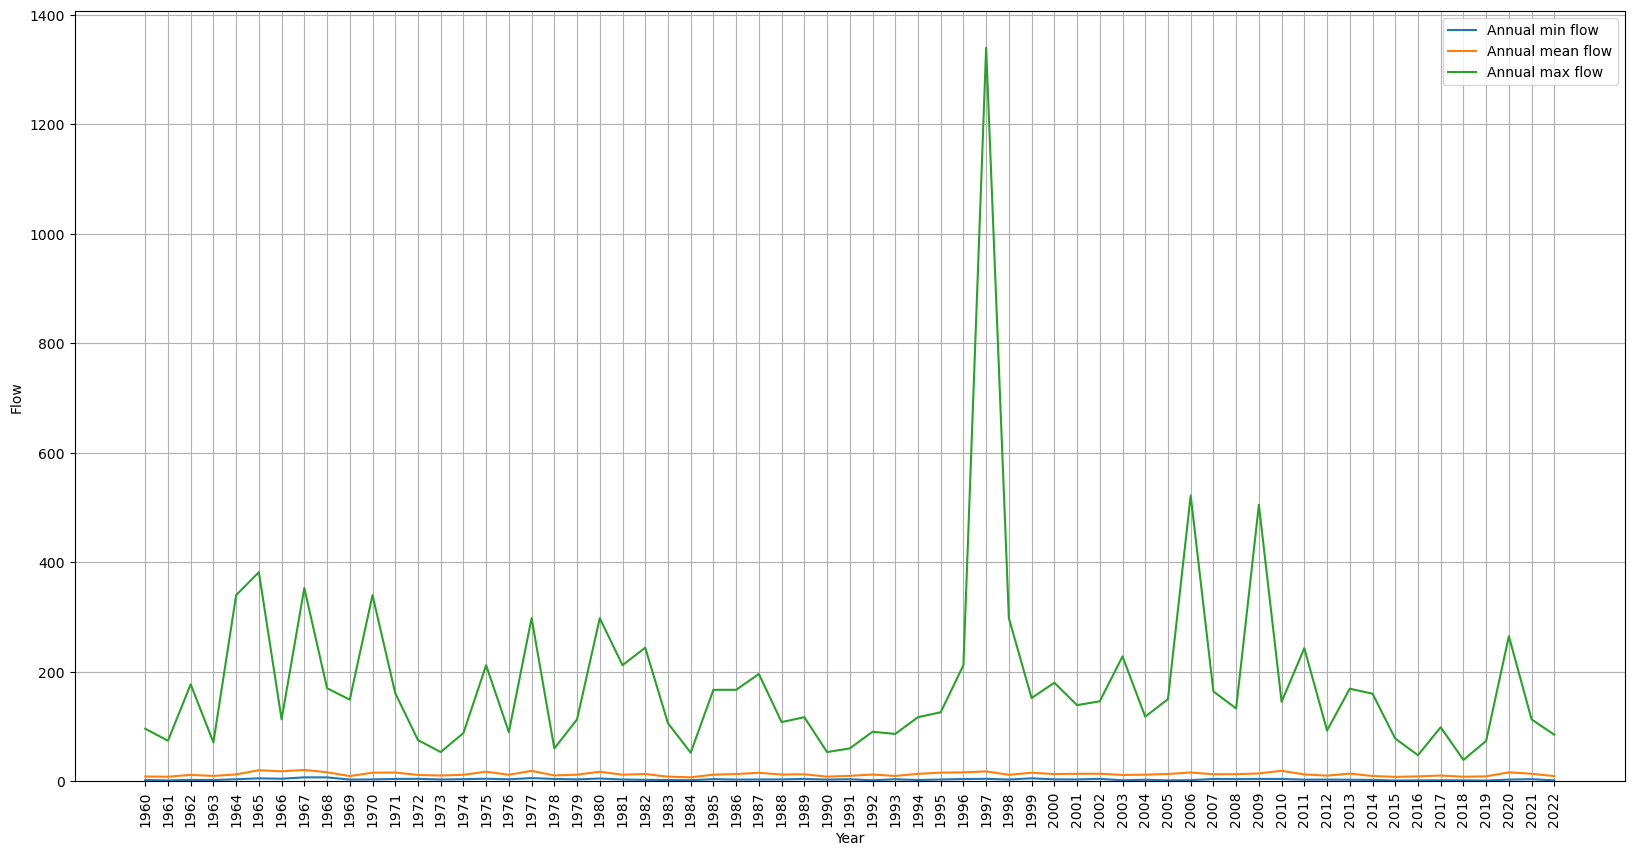

In [3]:
station = StationData(station_id=150160180)
station.analyse_period(start_year=1960, end_year=2023, param="Q")
df = station.basic_stats(param="Q")

# plot data
plt.figure(figsize=(20, 10))
sns.lineplot(data=df, x="year", y="year_min", label="Annual min flow")
sns.lineplot(data=df, x="year", y="year_mean", label="Annual mean flow")
sns.lineplot(data=df, x="year", y="year_max", label="Annual max flow")
plt.xlabel("Year")
plt.ylabel("Flow")
plt.xticks(rotation=90, horizontalalignment="center")
plt.ylim(0)
plt.grid(True)
plt.legend()
plt.show()

Poprawność obliczeń prawdopodobieństw przewyszenia przepływów nie została zweryfikowana! Dotyczy to zarówno rozkładu logarytmiczno-normalnego i GEV.

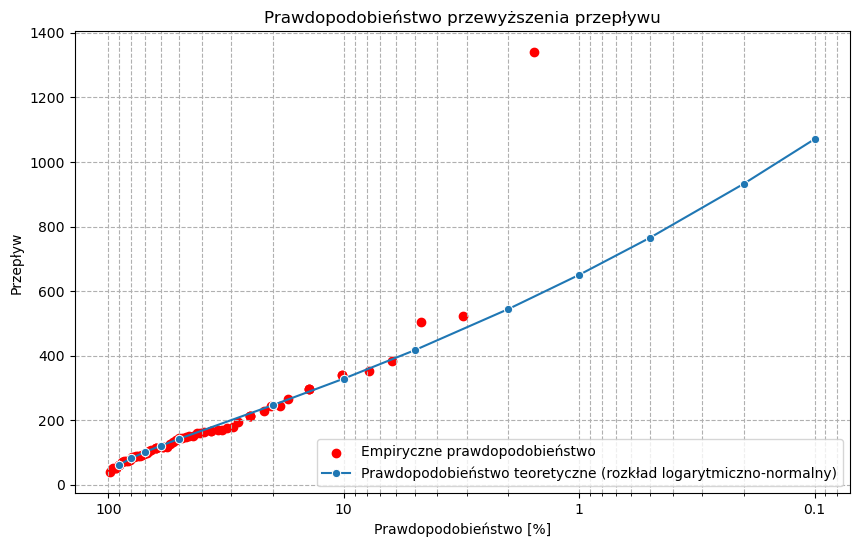

In [4]:
log_normal_analysis = LogNormalAnalysis(df)
log_normal_analysis.plot()

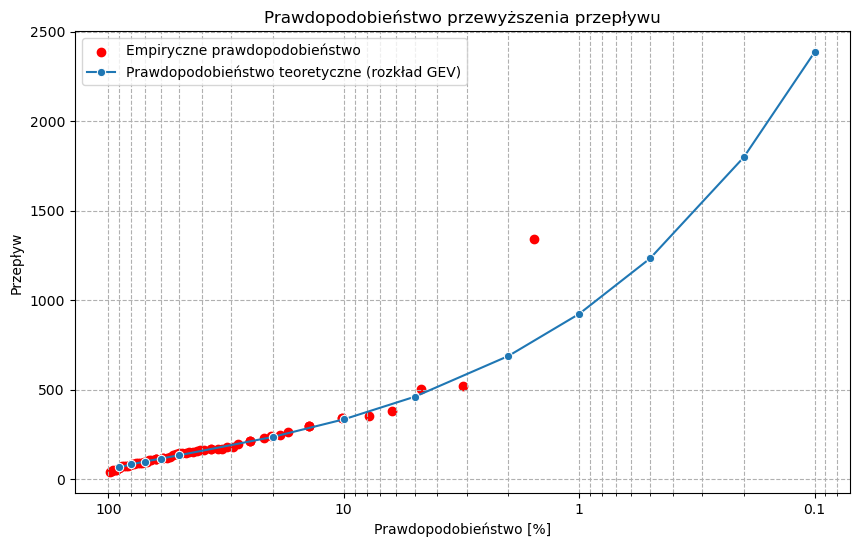

In [5]:
gen_extreme_analysis = GenExtremeAnalysis(df)
gen_extreme_analysis.plot()

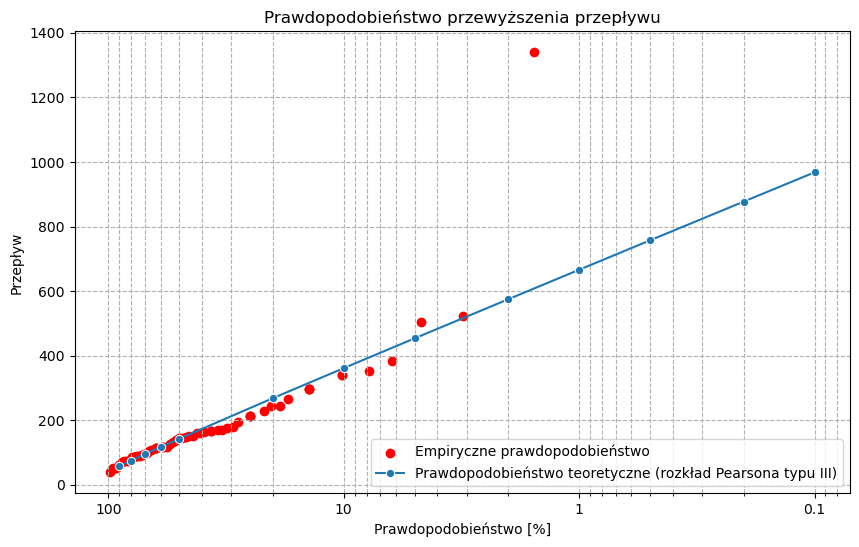

In [6]:
pearson_III_analysis = PearsonIIIAnalysis(df)
pearson_III_analysis.plot()

Sprawdzenie zgodności krzywych testem Kołmogorowa

In [7]:
log_normal_analysis.test_ks()

Statystyka testu KS: 0.07580864225790906, p-wartość: 0.8351047278128538


(0.07580864225790906, 0.8351047278128538)

In [8]:
gen_extreme_analysis.test_ks()

Statystyka testu KS: 0.059151818991414695, p-wartość: 0.9708728745225366


(0.059151818991414695, 0.9708728745225366)

In [9]:
pearson_III_analysis.test_ks()

Statystyka testu KS: 0.09665931307434705, p-wartość: 0.5651320494906896


(0.09665931307434705, 0.5651320494906896)